<a href="https://colab.research.google.com/github/cristiandarioortegayubro/BDS/blob/main/modulo.08/Apliacai%C3%B3n_RRN_AMZN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="center">
<img src="https://github.com/cristiandarioortegayubro/BDS/blob/main/images/Logo%20BDS%20Horizontal%208.png?raw=true">
</p>

Ejemplo extraído de https://medium.datadriveninvestor.com/stock-price-prediction-using-recurrent-neural-network-artificial-intelligence-ffe6ac1bd344

In [1]:
#importing libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import datetime
plt.style.use('fivethirtyeight')

In [2]:
!pip install yfinance

In [3]:
import yfinance as yf

In [17]:
#dataset of amazon stock info
df = yf.download('AMZN', start='2012-01-03', end='2020-08-15')
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,8.794500,8.974000,8.777500,8.951500,8.951500,102216000
2012-01-04,8.960500,9.025000,8.803500,8.875500,8.875500,84104000
2012-01-05,8.797000,8.912500,8.702500,8.880500,8.880500,76182000
2012-01-06,8.903500,9.232500,8.875000,9.130500,9.130500,140168000
2012-01-09,9.138000,9.218500,8.850000,8.928000,8.928000,101138000
...,...,...,...,...,...,...
2020-08-10,158.515503,158.625504,155.076004,157.408005,157.408005,63346000
2020-08-11,155.660004,157.960999,153.649994,154.033493,154.033493,74362000
2020-08-12,155.399994,158.719498,155.070999,158.112000,158.112000,70442000


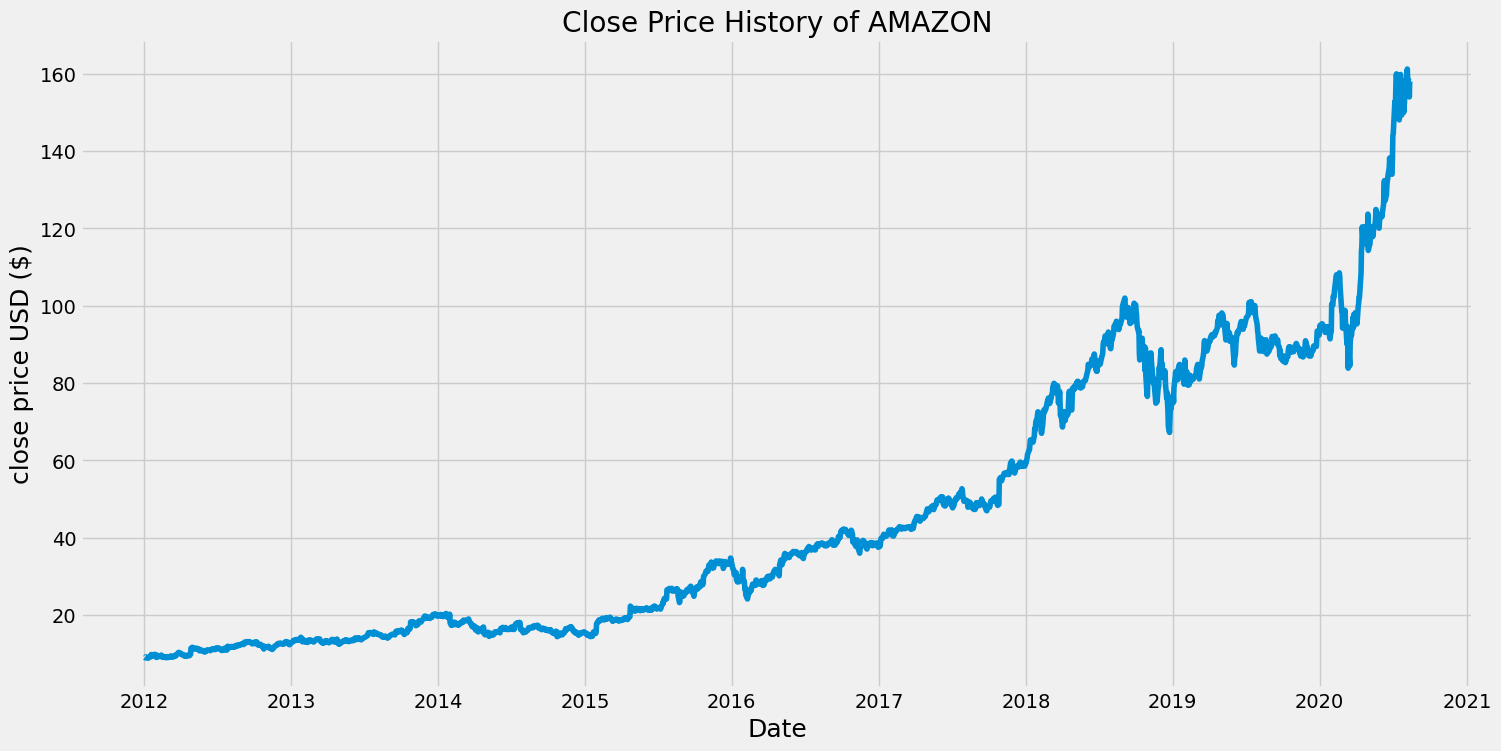

In [6]:
#Visualize the closing price history of amazon
plt.figure(figsize=(16,8))
plt.title('Close Price History of AMAZON')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('close price USD ($)',fontsize=18)
plt.show()

In [7]:
#Create a new data frame with only the 'Close column'
data = df.filter(['Close'])

#Convert the dataframe to numpy array
dataset = data.values

#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * .8 )

training_data_len

1735

In [8]:
#Scale the data before it presents to neural netrwork as it good practice by preprocessing the datae
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[1.01670170e-03],
       [5.18187641e-04],
       [5.50985277e-04],
       ...,
       [9.52664209e-01],
       [9.79416671e-01],
       [9.79016519e-01]])

In [9]:
#Create the training data set
#Crete the scaled training set
train_data = scaled_data[0:training_data_len , :]

#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(120, len(train_data)):
    x_train.append(train_data[i-120:i, 0])
    y_train.append(train_data[i,0])
    if i<=121:
        print(x_train)
        print(y_train)
        print()

[array([0.0010167 , 0.00051819, 0.00055099, 0.00219083, 0.00086256,
       0.00111837, 0.00097406, 0.        , 0.00081664, 0.00187926,
       0.00443086, 0.00607398, 0.00491953, 0.00333216, 0.00363062,
       0.00389299, 0.00570338, 0.00637572, 0.00531965, 0.0060707 ,
       0.00115773, 0.00189894, 0.00385363, 0.00236465, 0.00270902,
       0.0031321 , 0.00296811, 0.00315178, 0.00513599, 0.00504088,
       0.00280085, 0.00131187, 0.00215475, 0.00207604, 0.00152506,
       0.00097079, 0.0010495 , 0.00085272, 0.00258111, 0.00123316,
       0.00134795, 0.00110525, 0.0014201 , 0.00169232, 0.00257128,
       0.00384051, 0.00275165, 0.00244665, 0.00284021, 0.00207604,
       0.00278774, 0.00299107, 0.00314522, 0.00537869, 0.00518191,
       0.00540164, 0.00626748, 0.00883548, 0.00967836, 0.00827465,
       0.00940615, 0.00871741, 0.00725467, 0.0077827 , 0.00592312,
       0.0060543 , 0.00522782, 0.00362405, 0.00394875, 0.00484082,
       0.00410945, 0.00313866, 0.00408649, 0.00496545, 0.0049

In [10]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (pd.DataFrame(x_train).shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [11]:
#compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [12]:
#Train the model
model.fit(np.array(x_train), np.array(y_train), batch_size=1, epochs=1)

1615/1615 [==============================] - 96s 55ms/step - loss: 5.6597e-04


In [13]:
#Create the testing data set
#Create a new array containing scaled values from index 1616 to 2170
test_data = scaled_data[training_data_len - 120: , :]

#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(120, len(test_data)):
    x_test.append(test_data[i-120:i, 0])

In [14]:
#Get the model predicted price values
predictions = model.predict(np.array(x_test))
predictions = scaler.inverse_transform(predictions)

14/14 [==============================] - 2s 27ms/step


In [15]:
# Get the root mean squared error (RSME)
rsme = np.sqrt( np.mean( predictions - np.array(y_test ))**2 )
rsme

3.600037607805283

<ipython-input-16-a227fc0f8268>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


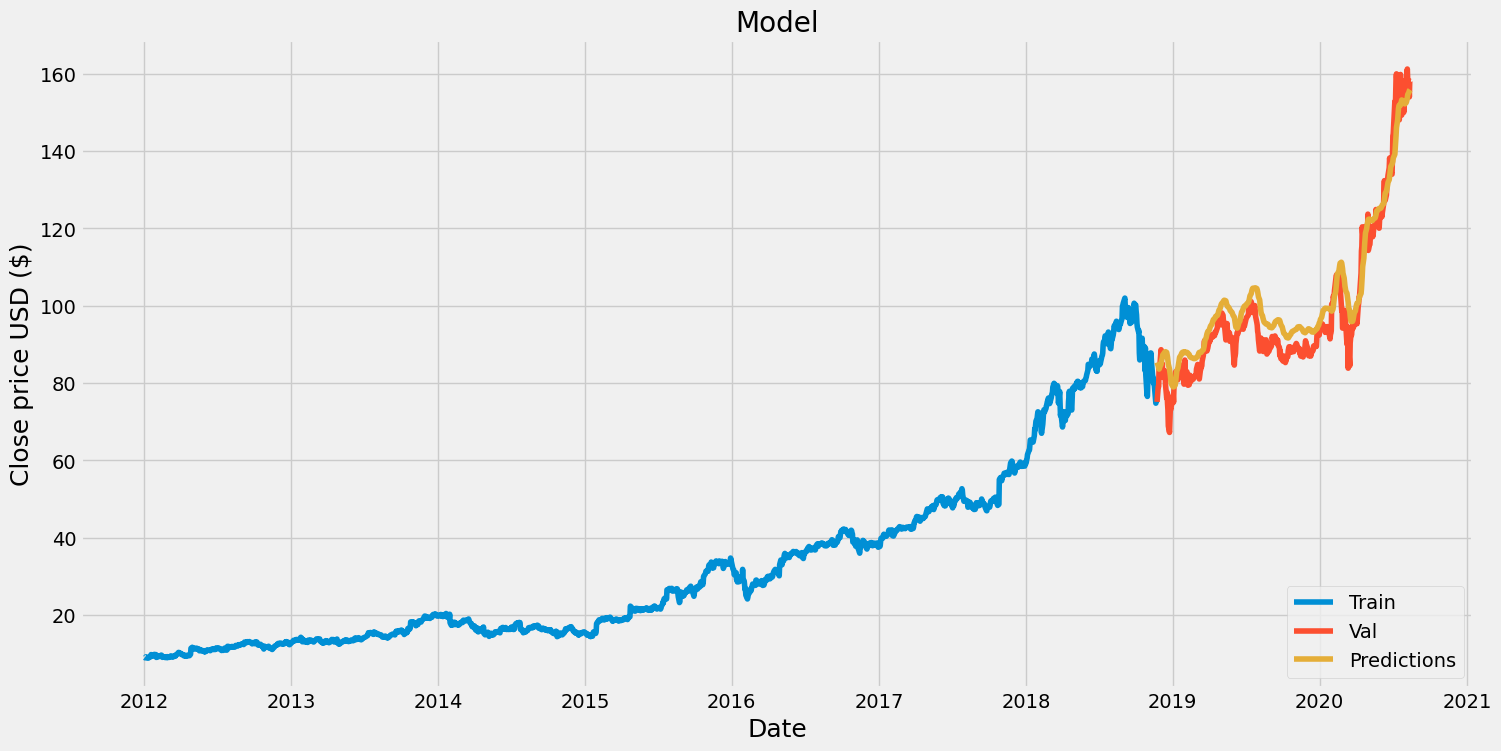

In [16]:
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

<br>
<br>
<p align="center"><b>
💗
<font color="DeepPink">
Hemos llegado al final de nuestro colab...
</font>
</p>
<br>
<p align="center">
<img src="https://github.com/cristiandarioortegayubro/BDS/blob/main/images/Logo%20BDS%20Horizontal%208.png?raw=true">
</p>

---